In [1]:
import matplotlib.pyplot as plt
import numpy as np

from experiments.evaluation_flow.shared import GOOGLENET, RESNET_152, MOBILENET, RESNET_18, RESNET_50, BASELINE
from experiments.evaluation_flow.shared import MODELS
from experiments.plots.util import *

In [2]:
ROOT_LOG_DIR = '../evaluation_flow/evaluation-flow-results/results'
VERSION = 'version'
FINE_TUNED = 'fine-tuned'

In [3]:
# get all file sin the directory
all_files = all_files_in_dir(ROOT_LOG_DIR)
node_server_files = [f for f in all_files if 'server' in f or 'node' in f]
# for all files extract the metadata (e.g. what model and dataset is used)
U_IDS = 'u_ids'

files_and_meta = [(extract_file_meta(f), f) for f in node_server_files]
# add a mapping: use_case -> model id
files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in files_and_meta]
# add the parsed events
files_and_meta = [({**f[0], **{EVENTS: parse_events(f[1])}}, f[1]) for f in files_and_meta]

In [4]:
valid_joined = join_server_and_node_meta(files_and_meta)

In [5]:
times = extract_times(valid_joined)

In [6]:
def rearrange_u2(use_cases):
    use_cases.sort()
    # remove U_2
    u2 = use_cases.pop(1)
    num_cases = len(use_cases)
    new_u2_pos = int((num_cases - 1) / 2) + 1
    use_cases.insert(new_u2_pos, u2)
    return use_cases

def plot_time_one_model(save_times, save_path=None, ignore_use_cases=[]):
    use_cases = rearrange_u2(list(save_times.keys()))

    for u in ignore_use_cases:
        use_cases.remove(u)

    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    times = [save_times[k] for k in use_cases]
    ax.bar(use_cases, times)
    ax.set_ylabel('Save time in seconds')
    ax.set_xlabel('Use case description')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()

In [7]:
def plot_median_high_level_save_time(metas, save_path=None, ignore_use_cases=[]):
    agg = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)
    plot_time_one_model(agg[HIGH_LEVEL_SAVE_TIMES], save_path, ignore_use_cases)

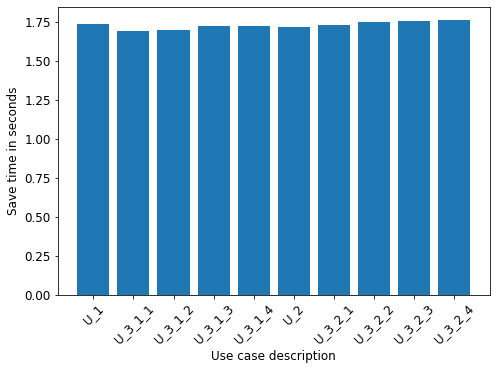

In [8]:
data = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_high_level_save_time(data)














In [15]:


























save_times = calc_save_times(baseline_version_food_server_0, baseline_version_food_node_0)
print(save_times)

{'resnet152': {'U_1': 2.884218203, 'U_2': 2.97563805, 'U_3_1_1': 2.73320811, 'U_3_1_2': 2.874668105, 'U_3_1_3': 2.906728698, 'U_3_1_4': 3.018493345, 'U_3_2_1': 3.143466162, 'U_3_2_2': 3.1924417540000003, 'U_3_2_3': 3.2854101470000003, 'U_3_2_4': 3.314493649}, 'mobilenet': {'U_1': 1.670808695, 'U_2': 1.7127418980000002, 'U_3_1_1': 1.6966172080000002, 'U_3_1_2': 1.703454924, 'U_3_1_3': 1.717453981, 'U_3_1_4': 1.7164160460000002, 'U_3_2_1': 1.7230210490000002, 'U_3_2_2': 1.7478758380000001, 'U_3_2_3': 1.7633548570000002, 'U_3_2_4': 1.762523716}, 'resnet50': {'U_1': 2.079562304, 'U_2': 2.1055126630000003, 'U_3_1_1': 2.0985620330000003, 'U_3_1_2': 2.1470785980000002, 'U_3_1_3': 2.187090104, 'U_3_1_4': 2.285064971, 'U_3_2_1': 2.33521897, 'U_3_2_2': 2.354611825, 'U_3_2_3': 2.389312127, 'U_3_2_4': 2.505424441}, 'googlenet': {'U_1': 1.820960919, 'U_2': 1.854520578, 'U_3_1_1': 1.8142075910000002, 'U_3_1_2': 1.8208129130000001, 'U_3_1_3': 1.8502121740000002, 'U_3_1_4': 1.9119142880000002, 'U_3_2_

In [7]:
def plot_recover_time_one_model(save_times, save_path=None):
    use_cases = rearrange_u2(list(save_times.keys()))

    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    times = [save_times[k] for k in use_cases]
    ax.bar(use_cases, times)
    ax.set_ylabel('Recover time in seconds')
    ax.set_xlabel('Use case description')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()


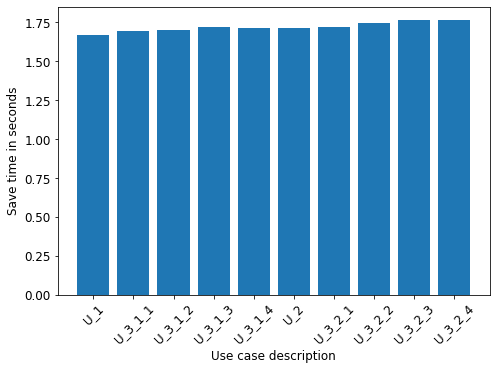

['U_1', 'U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [8]:
plot_save_time_one_model(save_times['mobilenet'], './pdfs/mobilenet.pdf')

In [9]:
# plot_save_time_one_model(save_times['googlenet'])
#

In [10]:
# plot_save_time_one_model(save_times['resnet18'])
#

In [11]:
# plot_save_time_one_model(save_times['resnet50'])
#

In [12]:
# plot_save_time_one_model(save_times['resnet152'])

In [13]:
all_files = all_files_in_dir(ROOT_LOG_DIR)
id_to_use_case = [id_use_case_dict(log_file) for log_file in all_files]
id_use_case_mapping = {}
for d in id_to_use_case:
    id_use_case_mapping.update(d)
print(id_use_case_mapping)


broken file: ../evaluation_flow/evaluation-flow-results/results/.DS_Store


TypeError: 'NoneType' object is not iterable

In [ ]:
rec_times = calc_recover_times(baseline_version_food_server_0)
print(rec_times)

In [ ]:
plot_recover_time_one_model(rec_times['mobilenet'])

In [ ]:

# set width of bars
barWidth = 0.1

bars = {}
for m in MODELS:
    times = save_times[m]
    for use_case, time in times.items():
        if use_case in bars:
            bars[use_case].append(time)
        else:
            bars[use_case] = [time]

# Set position of bar on X axis
# l = len(bars[U_1])
# print(l)
# positions = [np.arange(l)]
# for i in range(1, len(bars)):
#     prev_positions = positions[-1]
#     positions.append(prev_positions)

r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
positions = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]

colors = ['orange', 'red', 'green', 'blue', 'yellow', 'orange', 'red', 'green', 'blue', 'yellow']

for position, bar, color, label in zip(positions, list(bars.values())[:], colors, list(bars.keys())[:]):
    plt.bar(position, bar, color=color, width=barWidth, edgecolor='white', label=label)

# # Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
meta, events = baseline_version_food_server_0[0]
e_u1 = events[0]
e_u2 = events[5]
print(e_u1)
print(e_u2)



In [ ]:
meta, events = extract_event_and_and_meta('/Users/nils/Downloads/test-env-log.txt')

In [ ]:
for e in events:
    print(e)